## Necessary Imports

In [4]:
import matplotlib.pyplot as plt


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


## About Android Traffic Dataset

Public Source - Kaggle:
https://www.kaggle.com/datasets/xwolf12/network-traffic-android-malware

Paper:
Cao, D., Wang, S., Li, Q., Cheny, Z., Yan, Q., Peng, L., & Yang, B. (2016, August). DroidCollector: A High Performance Framework for High Quality Android Traffic Collection. In Trustcom/BigDataSE/I SPA, 2016 IEEE (pp. 1753-1758). IEEE

## Load Data from CSV File


In [11]:
# Read the CSV file with the correct delimiter
df = pd.read_csv('android_traffic.csv', sep=';')

# Display the first few rows of the DataFrame
df.head()


,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [12]:
df.tail()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
7840,Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious
7841,Zsone,4,4,1,296,0,0,5,1,86,382,NaN,NaN,NaN,5,1,malicious
7842,Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious
7843,Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious
7844,Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious


In [13]:
df.size

133365

In [14]:
df.shape

(7845, 17)

In [16]:
df.count()

name                    7845
tcp_packets             7845
dist_port_tcp           7845
external_ips            7845
vulume_bytes            7845
udp_packets             7845
tcp_urg_packet          7845
source_app_packets      7845
remote_app_packets      7845
source_app_bytes        7845
remote_app_bytes        7845
duracion                   0
avg_local_pkt_rate         0
avg_remote_pkt_rate        0
source_app_packets.1    7845
dns_query_times         7845
type                    7845
dtype: int64

In [19]:
df['type'].value_counts()

benign       4704
malicious    3141
Name: type, dtype: int64

## Distribution of the Classes


In [25]:
# Distribution of the classes
class_distribution = df['type'].value_counts()
print(class_distribution)


benign       4704
malicious    3141
Name: type, dtype: int64


## Selection of unwanted columns

In [26]:
# Selection of unwanted columns
unwanted_columns = ['duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate', 'source_app_packets.1']
df = df.drop(unwanted_columns, axis=1)


## Remove unwanted columns

In [28]:
# Check if columns exist before dropping
columns_to_drop = [col for col in unwanted_columns if col in df.columns]

In [29]:
# Drop unwanted columns
df = df.drop(columns_to_drop, axis=1)

## Divide the data as Train/Test dataset

In [31]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df.drop('type', axis=1)
y = df['type']


In [32]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Display the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (6276, 12) (6276,)
Test set shape: (1569, 12) (1569,)


## Modeling (SVM with Scikit-learn)

In [45]:
# Get common columns in both sets
common_columns = X_train.columns.intersection(X_test.columns)

# Keep only the common columns in both sets
X_train = X_train[common_columns]
X_test = X_test[common_columns]


In [46]:
# Initialize the SVM model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.6022944550669216
Confusion Matrix:
[[937   1]
 [623   8]]
Classification Report:
              precision    recall  f1-score   support

      benign       0.60      1.00      0.75       938
   malicious       0.89      0.01      0.03       631

    accuracy                           0.60      1569
   macro avg       0.74      0.51      0.39      1569
weighted avg       0.72      0.60      0.46      1569



## Evaluation (Results)

In [47]:
# Lakukan prediksi pada data uji
y_pred = svm_model.predict(X_test)

# Tampilkan laporan klasifikasi dan matriks kebingungan
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

      benign       0.60      1.00      0.75       938
   malicious       0.89      0.01      0.03       631

    accuracy                           0.60      1569
   macro avg       0.74      0.51      0.39      1569
weighted avg       0.72      0.60      0.46      1569

Confusion Matrix:
 [[937   1]
 [623   8]]


## Visualisasi Data

### Plot Matriks Kebingungan 

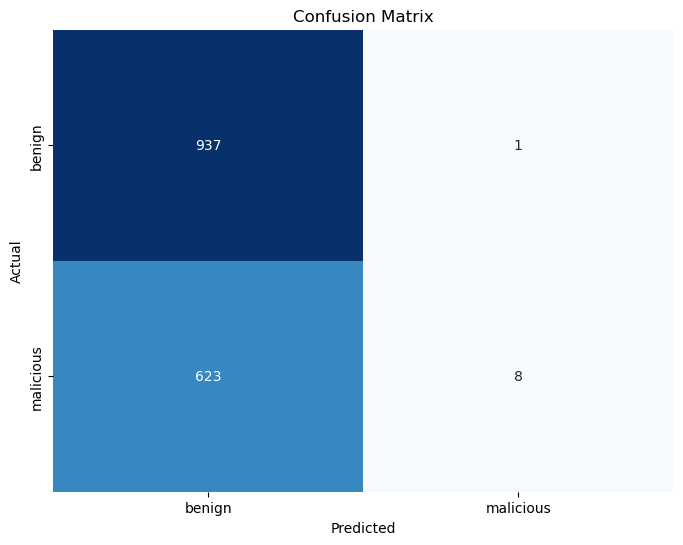

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['benign', 'malicious'], columns=['benign', 'malicious'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


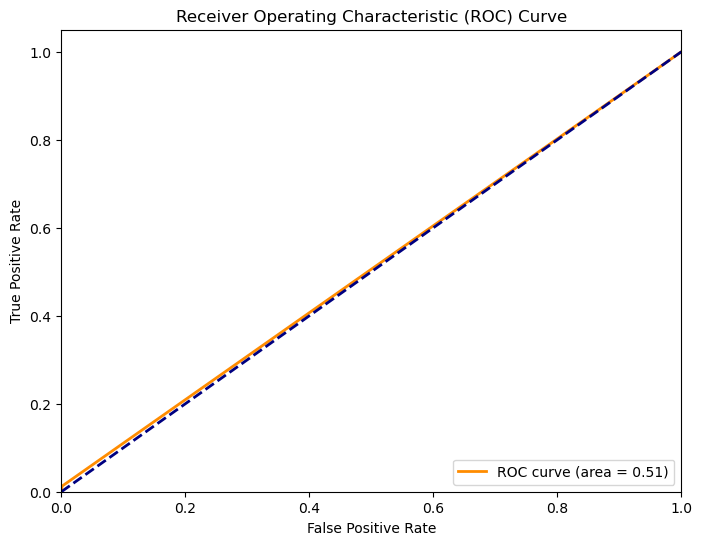

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Convert labels to binary format
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Confusion Matrix Heatmap:
Visualisasikan matriks kebingungan untuk melihat seberapa baik model Anda melakukan klasifikasi pada setiap kelas.

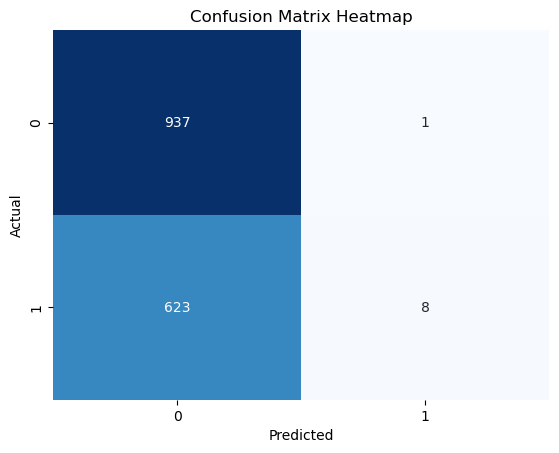

In [56]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


## Receiver Operating Characteristic (ROC) Curve:
Visualisasikan kurva ROC untuk mengukur kinerja model pada berbagai tingkat ambang.

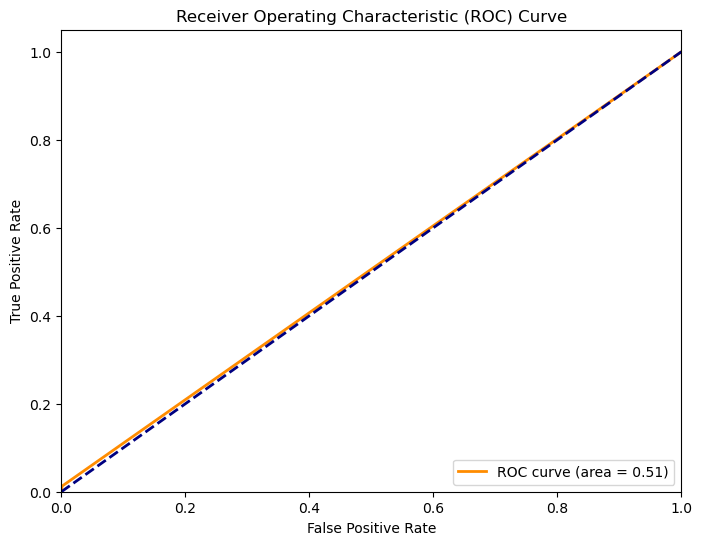

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Convert labels to binary format
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Precision-Recall Curve:
Visualisasikan kurva presisi-recall untuk mendapatkan pemahaman lebih lanjut tentang performa model pada klasifikasi yang tidak seimbang.

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_bin.ravel())

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


NameError: name 'y_test_bin' is not defined